### 001딥러닝 모델 설계

In [8]:
pip list


Package                           Version
--------------------------------- -------------------
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.17.1
altair                            5.5.0
anaconda-anon-usage               0.7.1
anaconda-auth                     0.8.6
anacond

In [11]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 1. 환경 준비

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

### 2. 데이터 준비

In [25]:
Data_set = np.loadtxt('ThoraricSurgery3.csv', delimiter=',')
X = Data_set[:,0:16]
Y = Data_set[:,16]


### 3. 구조 결정

In [62]:
model = Sequential()
model.add(Dense(256, input_dim=16, activation='relu'))
#hidden layer
    #문제의 특징을 학습하고 패턴을 찾음
    #뉴런 개수는 내 마음대로 정해짐
    #학습효율을 위해 relu 함수 사용 
    #input_dim: 모델에 들어올 데이터 속성(feature)의 수로 데이터 셋의 컬럼 열의 개수와 무조건 똑같아야 함
    #Dense: 모델의 레이어를 추가하는 함수

model.add(Dense(1, activation='sigmoid'))
#input layer + output layer
    #입력 설정(input_dim)은 불필요
    #학습된 내용을 바탕으로 예측
    #Dense(1): 최종 결과값은 1개 
    #sigmoid: 0과 1 사이의 확률값으로 압축, 문제에 따라 softmax 사용
    #뉴런 개수가 정해져 있음



### 4. 모델 실행

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=99, batch_size=20)

Epoch 1/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7319 - loss: 1.0415   
Epoch 2/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4979 
Epoch 3/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4352 
Epoch 4/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4233 
Epoch 5/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4280 
Epoch 6/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4186 
Epoch 7/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4291 
Epoch 8/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4119 
Epoch 9/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4076 
Epoch 10/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4031 
Epoch 11/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4060 
Epoch 12/99
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

accuracy: 0.8617 - loss: 0.3852


### 002 데이터 다루기

### 판다스를 활용한 데이터 조사

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\강의 교안\딥러닝\pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [67]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


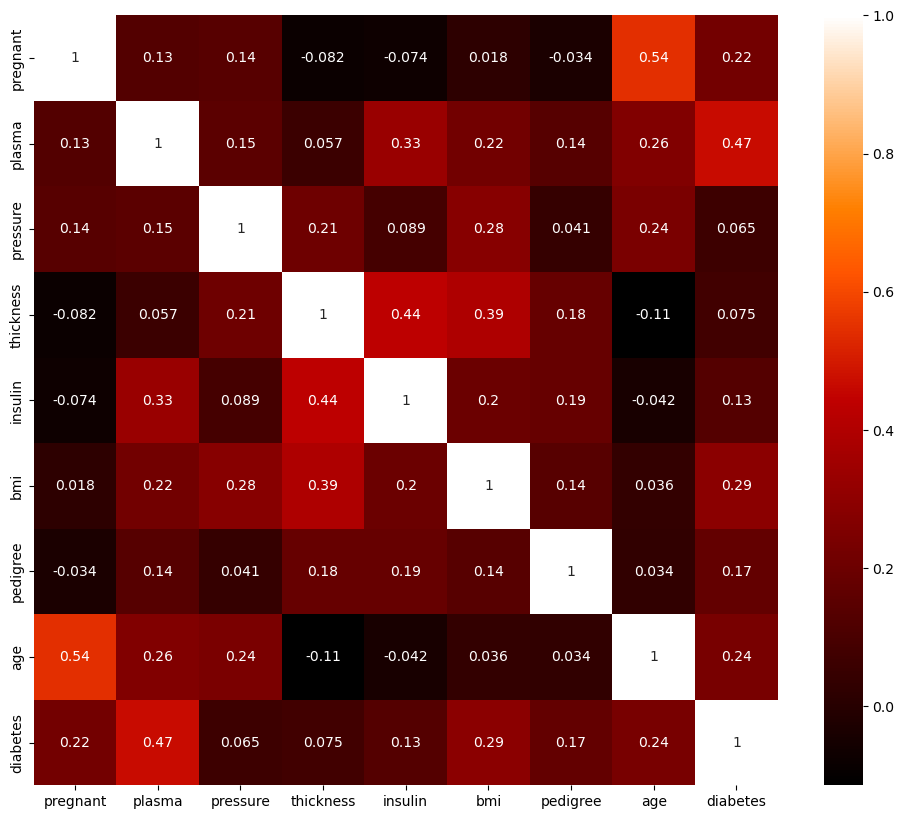

In [69]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap=colormap)
plt.show()


### 

### 중요한 데이터 추출하기

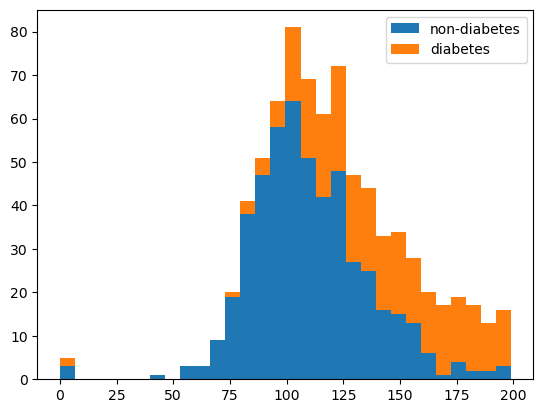

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#plasma(혈당)를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 확인
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30,
histtype ='barstacked', label = ['non-diabetes', 'diabetes'])
#df.plasma[df.diabetes==0] : 전체 데이터에서 당뇨병이 없는 사람들의 혈장 데이터만 불리언 인덱싱으로 추출
#df.plasma[df.diabetes==1] : 전체 데이터에서 당뇨병이 있는 사람들의 혈장 데이터만 불리언 인덱싱으로 추출
#두 리스트를 x 라는 하나의 리스트로 합침
#histtype ='barstacked' : 두 집단의 빈도를 위로 쌓아 올리는 방식
plt.legend()
plt.show()

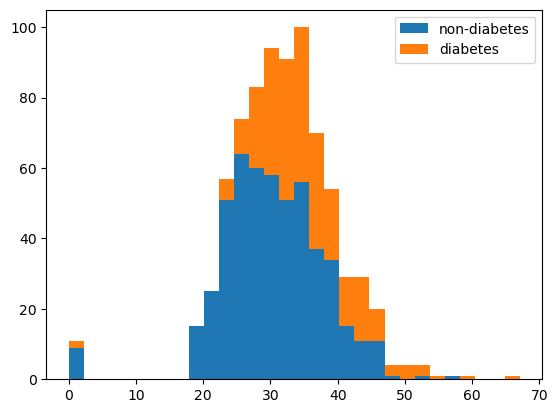

In [ ]:
#BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 확인
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['non-diabetes', 'diabetes'])
plt.legend()

### 피마 인디언 당뇨병 예측 실행

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
import pandas as pd

df = pd.read_csv('C:\강의 교안\딥러닝\pima-indians-diabetes3.csv')

In [81]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [82]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation = 'relu', name = 'Dense_1'))
model.add(Dense(8, activation = 'relu', name = 'Dense_2'))
model.add(Dense(1, activation = 'sigmoid', name = 'Dense_3'))
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs =100, batch_size = 5)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5911 - loss: 3.3292
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6185 - loss: 1.1407
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6133 - loss: 1.0393  
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6367 - loss: 0.9278
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6263 - loss: 0.9149
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6367 - loss: 0.8268
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6159 - loss: 0.7810
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6354 - loss: 0.8108
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6628 - loss: 0.7553  
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6589 - loss: 0.7462
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6654 - loss: 0.7093
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━

In [87]:
print("\n loss: %.4f"% (model.evaluate(X,Y)[0]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.5240 

 loss: 0.5240


In [ ]:
#index[0]: Loss 손실값, index[1]: Accuracy 정확도 (metrics에 설정한 평가지표)
model.evaluate(X,Y)
#학습된 모델에게 데이터 X와 정답 Y를 주고 성능평가 하는 함수 
#Return Value로는 list를 반환
   #값의 순서는 모델을 compile 할 때 설정한 내용에 따라 결정, metrics에 설정한 평가지표 순서

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.5240 


[0.5239633917808533, 0.7473958134651184]

In [88]:
print("\n Accuracy: %.4f"%(model.evaluate(X,Y)[1]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.5240 

 Accuracy: 0.7474


### 다중 분류 문제 해결하기

In [91]:
import pandas as pd
df = pd.read_csv('C:\강의 교안\딥러닝\iris3.csv')

In [92]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 상관도 그래프

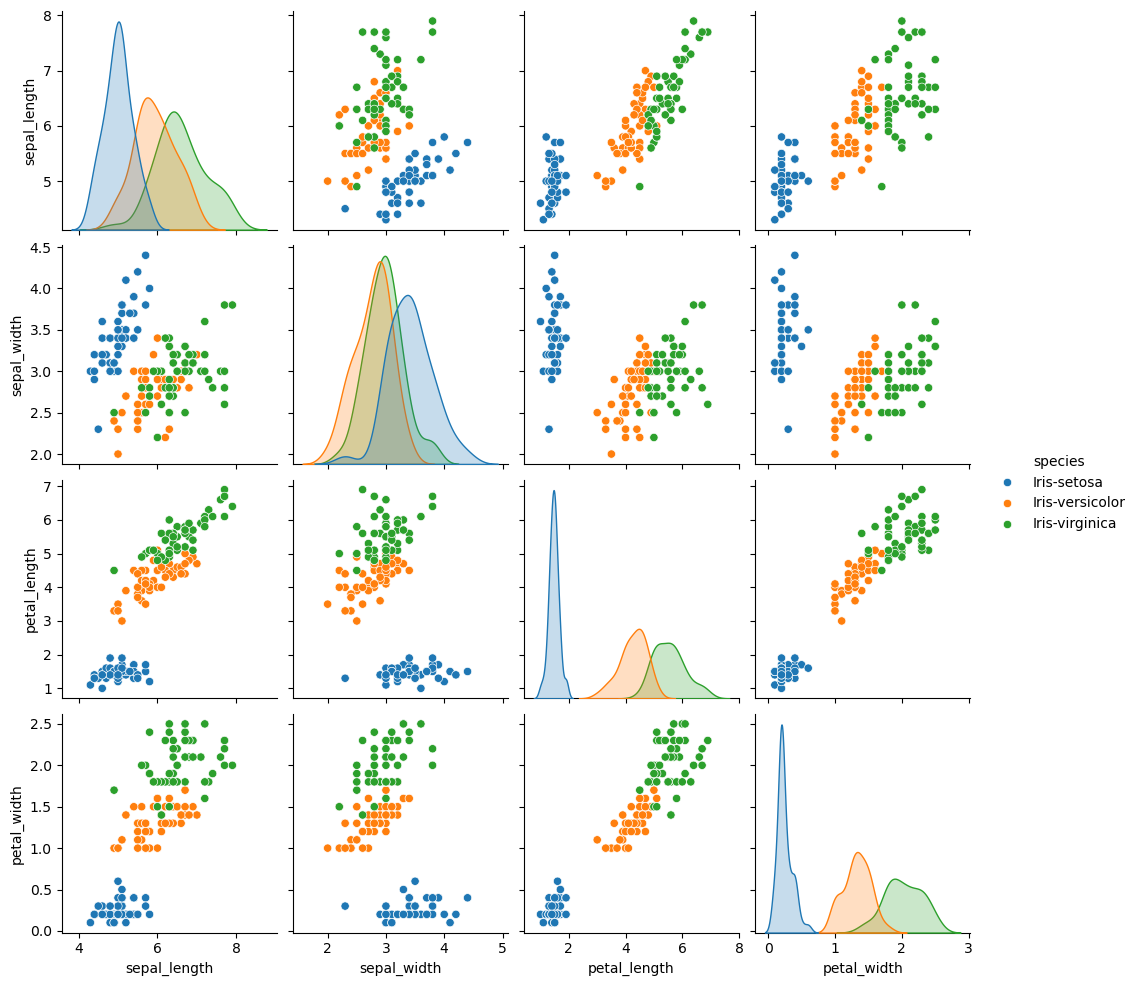

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species');
plt.show()

### 원 핫 인코딩

In [95]:
X = df.iloc[:,0:4]
Y = df.iloc[:,4]

In [96]:
print(X[0:5])
print(Y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [ ]:
#원-핫 인코딩 처리를 합니다.
Y = pd.get_dummies(Y)
print(Y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False


### 소프트맥스

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [103]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X,Y, epochs=30, batch_size=5)



Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3333 - loss: 1.0839   
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3733 - loss: 0.9814     
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6467 - loss: 0.9033 
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.8405 
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7667 - loss: 0.7720 
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6667 - loss: 0.7207 
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6733 - loss: 0.6764 
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6800 - loss: 0.6329 
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7133 - loss: 0.5960 
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8400 - loss: 0.5582 
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5239 
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

### 아이리스 품종 예측 실행

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('C:\강의 교안\딥러닝\iris3.csv')


In [112]:

X=df.iloc[:0:4]
Y=df.iloc[:,4]

Y = pd.get_dummies(Y)


In [114]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,Y, epochs=30, batch_size=5)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 0
'y' sizes: 150
